In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta,binom,uniform,norm,truncnorm

In [3]:
theta = np.linspace(0, 1, 1000)
analytical_posterior_pdf = beta.pdf(theta, a=135, b=67)

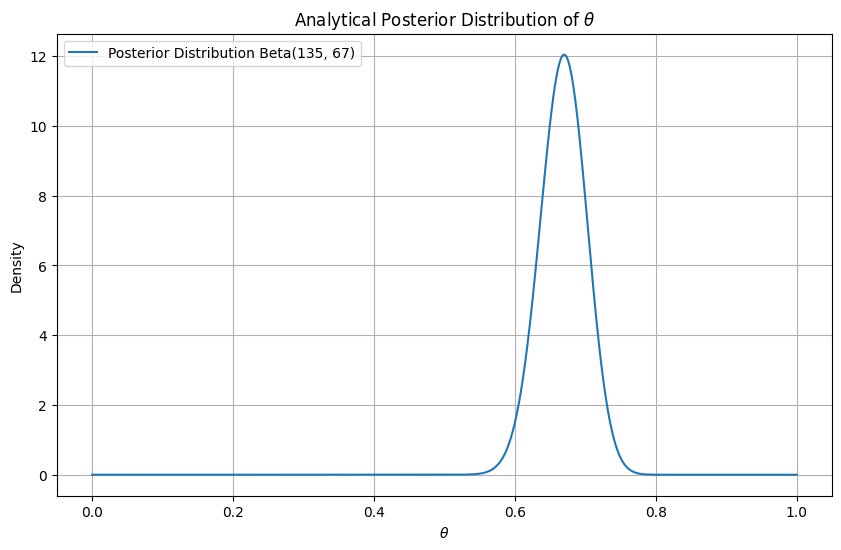

In [4]:
# Plot the posterior distribution
plt.figure(figsize=(10, 6))
plt.plot(theta, analytical_posterior_pdf, label='Posterior Distribution Beta(135, 67)')
plt.title('Analytical Posterior Distribution of $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
data = [10, 15, 15, 14, 14, 14, 13, 11, 12, 16]
n = 20 # no of trials
theta_grid = np.linspace(0, 1, 1000)
prior = np.ones_like(theta_grid) # for beta(1,1) means all priors just 1
likelihood = np.ones_like(theta_grid)
for y in data:
    likelihood *= binom.pmf(y, n, theta_grid)
    
unnormalized_posterior = prior * likelihood
# Normalize the posterior
posterior = unnormalized_posterior / np.sum(unnormalized_posterior)
    

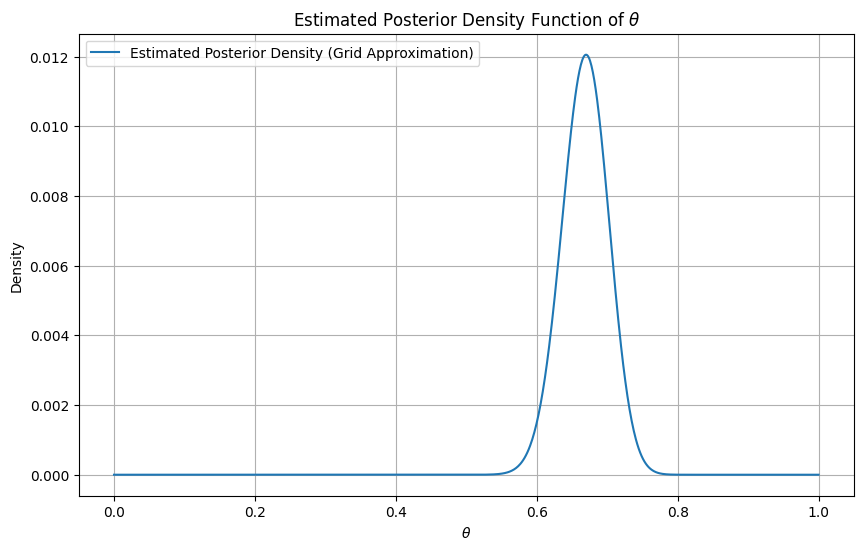

In [6]:
# Plot the estimated posterior density function
plt.figure(figsize=(10, 6))
plt.plot(theta_grid, posterior, label='Estimated Posterior Density (Grid Approximation)')
plt.title('Estimated Posterior Density Function of $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Q1-3
num_samples = 100000
theta_samples = beta.rvs(1, 1, size=num_samples)
likelihoods = np.ones(num_samples)
for y in data:
    likelihoods *= binom.pmf(y, n, theta_samples)

marginal_likelihood = np.mean(likelihoods)
print(f'Marginal Likelihood = {marginal_likelihood}')

Marginal Likelihood = 1.4105524568144684e-10


In [8]:
# Q1-4
proposal_samples = uniform.rvs(0, 1, size=num_samples)
likelihoods = np.ones(num_samples)
for y in data:
    likelihoods *= binom.pmf(y, n, proposal_samples)

priors = beta.pdf(proposal_samples, 1, 1)
proposal_density = uniform.pdf(proposal_samples, 0, 1)

weights = likelihoods * priors / proposal_density
# Normalize the weights
weights /= np.sum(weights)
# dataframe
df = pd.DataFrame({'theta': proposal_samples, 'weights': weights})
# Sample N/4 samples from the initial samples based on their weights
posterior_samples = df.sample(n=num_samples//4, weights='weights', replace=True)['theta']
# Display the posterior samples
posterior_samples.head()

24747    0.674804
53593    0.604649
56309    0.630073
45632    0.626874
81673    0.665878
Name: theta, dtype: float64

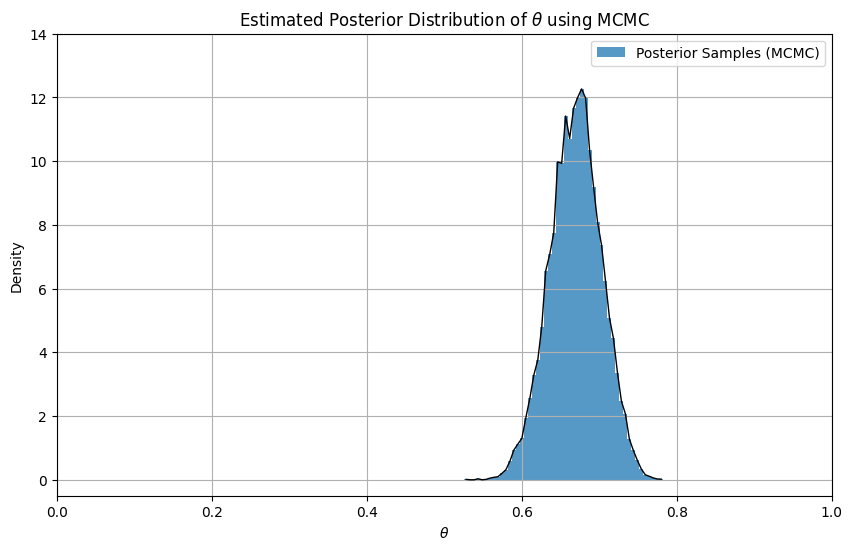

In [9]:
# Q1-5 
# MCMC
num_samples = 30000
theta_chain = np.empty(num_samples)
# init
theta_chain[0] = np.random.beta(1,1)
step = 0.08
index=0
while index<num_samples-1:
    proposal_theta = np.random.normal(theta_chain[index],step)
    
    if 0<proposal_theta<1:
        posterior_new = np.prod([binom.pmf(data_,n,proposal_theta) for data_ in data])*beta.pdf(proposal_theta,1,1)
        posterior_prev = np.prod([binom.pmf(data_,n,theta_chain[index]) for data_ in data])*beta.pdf(theta_chain[index],1,1)
        # hastings ratio - (posterior_new/g_prev)/(posterior_prev/g_new)
        hastings_ratio = (posterior_new*norm.pdf(theta_chain[index], proposal_theta, step))/(posterior_prev*norm.pdf(proposal_theta, theta_chain[index], step))
        accept_prob = min(1,hastings_ratio)
        if accept_prob > np.random.uniform(0, 1):
            theta_chain[index + 1] = proposal_theta
            index += 1
        else:
            theta_chain[index + 1] = theta_chain[index]
            index += 1    
    else:
        theta_chain[index + 1] = theta_chain[index]
        index += 1
        
# Plot the estimated posterior distribution
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(theta_chain, bins=50, density=True, label='Posterior Samples (MCMC)', alpha=0.75)
# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2
# Plot a line connecting bin centers
plt.plot(bin_centers, counts, linestyle='-', color='black', linewidth=1)
plt.xlim(0,1)
plt.ylim(-0.5,14)
plt.title('Estimated Posterior Distribution of $\\theta$ using MCMC')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


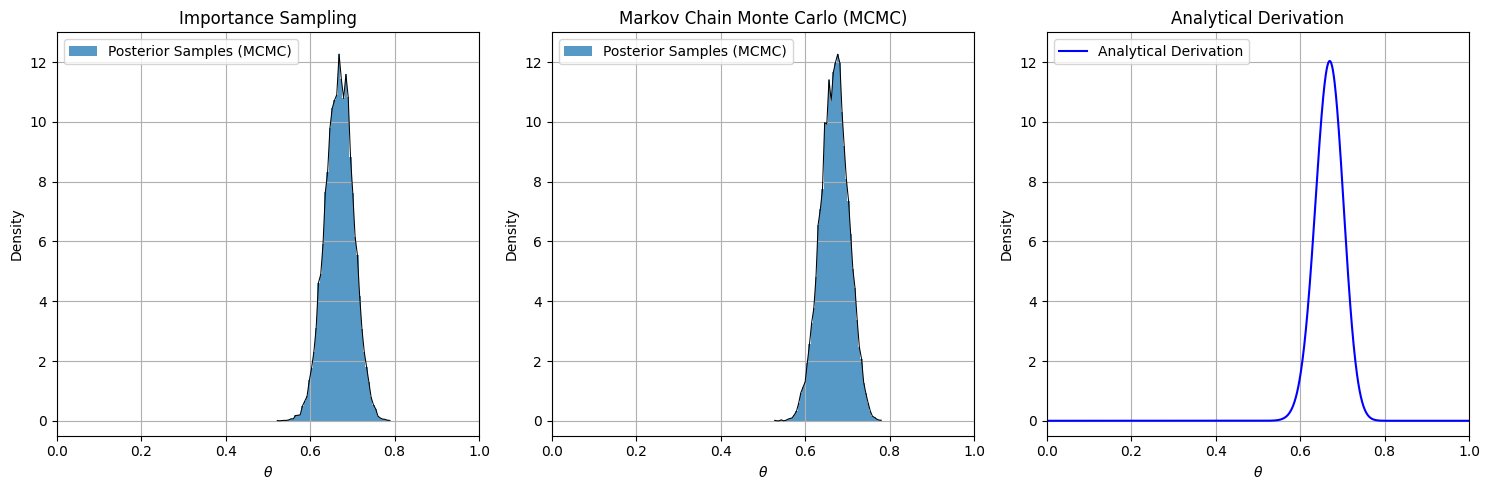

In [10]:
plt.figure(figsize=(15, 5))

# Subplot 1: Importance Sampling
plt.subplot(1, 3, 1)
counts, bins, _ = plt.hist(posterior_samples, bins=50, density=True, label='Posterior Samples (MCMC)', alpha=0.75)
# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2
# Plot a line connecting bin centers
plt.plot(bin_centers, counts, linestyle='-', color='black', linewidth=0.75)
plt.title('Importance Sampling')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(-0.5, 13)


# Subplot 2: MCMC
plt.subplot(1, 3, 2)
counts, bins, _ = plt.hist(theta_chain, bins=50, density=True, label='Posterior Samples (MCMC)', alpha=0.75)
# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2
# Plot a line connecting bin centers
plt.plot(bin_centers, counts, linestyle='-', color='black', linewidth=0.75)
plt.title('Markov Chain Monte Carlo (MCMC)')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(-0.5, 13)

# Subplot 3: Analytical Derivation
plt.subplot(1, 3, 3)
theta__ = np.linspace(0, 1, 1000)
plt.plot(theta__, analytical_posterior_pdf, label='Analytical Derivation', color='blue')
plt.title('Analytical Derivation')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.ylim(-0.5, 13)
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

Q2 below

In [11]:
# Q2
# Load data
url = "https://raw.githubusercontent.com/yadavhimanshu059/CGS698C/main/notes/Data/word-recognition-times.csv"
dat = pd.read_csv(url)

# Convert 'type' to numeric indicator
dat['type_indicator'] = np.where(dat['type'] == 'word', 0, 1)

# Extract data
y = dat['RT'].values
type_indicator = dat['type_indicator'].values

# Define log likelihood function
def log_likelihood(alpha, beta, sigma, RT, type_indicator):
    mu = alpha + beta * type_indicator
    return np.sum(norm.logpdf(RT, loc=mu, scale=sigma))

# Prior distributions
def prior_alpha(alpha):
    return norm.logpdf(alpha, loc=400, scale=50)

def prior_beta(beta):
    return np.log(truncnorm.pdf(beta, a=0,b=np.inf ,loc=0, scale=50))

# MCMC settings
nsamp = 10000  # Number of samples
alpha_chain = np.zeros(nsamp)
beta_chain = np.zeros(nsamp)

# Initial values
alpha_chain[0] = np.random.normal(400, 50)
beta_chain[0] = truncnorm.rvs(a=0,b=np.inf, loc=0, scale=50)

step_alpha = 0.1
step_beta = 0.1

i = 0
while i < nsamp - 1:
    # Propose new values
    proposal_alpha = np.random.normal(alpha_chain[i], step_alpha)
    proposal_beta = truncnorm.rvs(a=0,b=np.inf ,loc=beta_chain[i], scale=step_beta)

    # Calculate log posterior
    post_new = (log_likelihood(proposal_alpha, proposal_beta, 30, y, type_indicator) +
                prior_alpha(proposal_alpha) +
                prior_beta(proposal_beta))

    post_prev = (log_likelihood(alpha_chain[i], beta_chain[i], 30, y, type_indicator) +
                 prior_alpha(alpha_chain[i]) +
                 prior_beta(beta_chain[i]))

    # Hastings ratio
    Hastings_ratio = np.exp(post_new - post_prev)
    p_accept = min(Hastings_ratio, 1)  # probability of acceptance

    if p_accept > np.random.uniform(0, 1):
        alpha_chain[i + 1] = proposal_alpha
        beta_chain[i + 1] = proposal_beta
        i += 1

# Calculate the 95% credible intervals
alpha_credible_interval = np.quantile(alpha_chain, [0.025, 0.975])
beta_credible_interval = np.quantile(beta_chain, [0.025, 0.975])

# Print first few samples
print("First few samples of alpha:")
print(alpha_credible_interval[:10])
print("First few samples of beta:")
print(beta_credible_interval[:10])

# Results
print(f"95% credible interval for alpha: {alpha_credible_interval}")
print(f"95% credible interval for beta: {beta_credible_interval}")



First few samples of alpha:
[355.85502101 424.75251576]
First few samples of beta:
[ 28.71680387 177.42448195]
95% credible interval for alpha: [355.85502101 424.75251576]
95% credible interval for beta: [ 28.71680387 177.42448195]


Q3 below

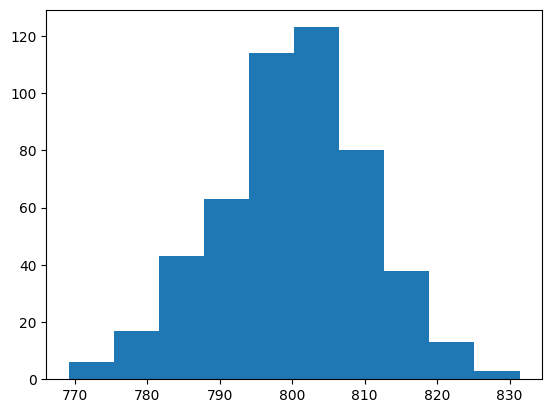

In [12]:
# Q3-1
true_mu = 800
true_var = 100 #sigmaˆ2
y = np.random.normal(loc=true_mu,scale=np.sqrt(true_var),size=500)
plt.hist(y)
plt.show()

In [13]:
# Gradient function
def gradient(mu, sigma, y, n, m, s, a, b):
    grad_mu = (((n * mu) - np.sum(y)) / (sigma**2)) + ((mu - m) / (s**2))
    grad_sigma = (n / sigma) - (np.sum((y - mu)**2) / (sigma**3)) + ((sigma - a) / (b**2))
    return np.array([grad_mu, grad_sigma])

# Potential energy function
def V(mu, sigma, y, n, m, s, a, b):
    nlpd = -(np.sum(norm.logpdf(y, mu, sigma)) + norm.logpdf(mu, m, s) + norm.logpdf(sigma, a, b))
    return nlpd

# HMC sampler
def HMC(y, n, m, s, a, b, step, L, initial_q, nsamp, nburn):
    mu_chain = np.zeros(nsamp)
    sigma_chain = np.zeros(nsamp)
    reject = 0
    
    # Initialization of Markov chain
    mu_chain[0] = initial_q[0]
    sigma_chain[0] = initial_q[1]
    
    # Evolution of Markov chain
    for i in range(1, nsamp):
        q = np.array([mu_chain[i - 1], sigma_chain[i - 1]])  # Current position of the particle
        p = np.random.normal(0, 1, 2)  # Generate random momentum at the current position
        current_q = q.copy()
        current_p = p.copy()
        current_V = V(current_q[0], current_q[1], y, n, m, s, a, b)  # Current potential energy
        current_T = np.sum(current_p**2) / 2  # Current kinetic energy
        
        # Take L leapfrog steps
        for k in range(L):
            p -= (step / 2) * gradient(q[0], q[1], y, n, m, s, a, b)
            q += step * p
            p -= (step / 2) * gradient(q[0], q[1], y, n, m, s, a, b)
        
        proposed_q = q.copy()
        proposed_p = p.copy()
        proposed_V = V(proposed_q[0], proposed_q[1], y, n, m, s, a, b)  # Proposed potential energy
        proposed_T = np.sum(proposed_p**2) / 2  # Proposed kinetic energy
        accept_prob = min(1, np.exp(current_V + current_T - proposed_V - proposed_T))
        
        # Accept/reject the proposed position q
        if accept_prob > np.random.rand():
            mu_chain[i] = proposed_q[0]
            sigma_chain[i] = proposed_q[1]
        else:
            mu_chain[i] = current_q[0]  # Retain the previous value
            sigma_chain[i] = current_q[1]  # Retain the previous value
            reject += 1
    
    # Remove burn-in samples
    mu_chain = mu_chain[nburn:]
    sigma_chain = sigma_chain[nburn:]
    
    # Plot the chains
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(mu_chain)
    plt.title(f'$\mu$ Chain for nsamp={nsamp} for step size = {step}')
    plt.xlabel('Iteration')
    plt.ylabel('$\mu$')
    
    plt.subplot(1, 2, 2)
    plt.plot(sigma_chain)
    plt.title(f'$\sigma$ Chain for nsamp={nsamp} for step size = {step}')
    plt.xlabel('Iteration')
    plt.ylabel('$\sigma$')
    
    plt.tight_layout()
    plt.show()
    
    # returning dataframe for mu and sigma values
    return pd.DataFrame({'mu_chain': mu_chain, 'sigma_chain': sigma_chain})



C:\Users\aryan\AppData\Local\Temp\ipykernel_14756\2086665279.py:41: RuntimeWarning: overflow encountered in exp
  accept_prob = min(1, np.exp(current_V + current_T - proposed_V - proposed_T))


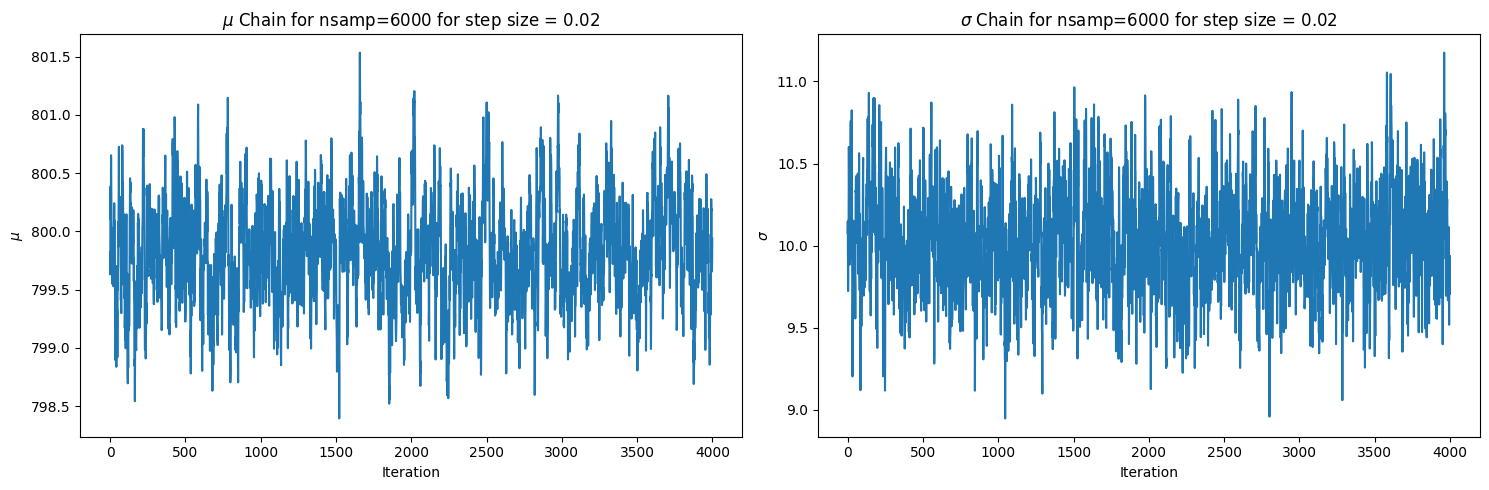

95% credible interval for μ: [798.98060193 800.69234717]
95% credible interval for σ: [ 9.42771722 10.65371654]


In [14]:
# Generate data
np.random.seed(0)
true_mu = 800
true_var = 100
y = np.random.normal(true_mu, np.sqrt(true_var), 500)

# Set parameters
nsamp = 6000
nburn = 2000
step = 0.02
leapfrog = 12
initial_q = [1000, 11]

# Run HMC sampler
df_posterior = HMC(y=y, n=len(y), m=1000, s=20, a=10, b=2, step=step, L=leapfrog, initial_q=initial_q,
                   nsamp=nsamp, nburn=nburn)

# Calculate and print 95% credible intervals
mu_ci = np.percentile(df_posterior['mu_chain'], [2.5, 97.5])
sigma_ci = np.percentile(df_posterior['sigma_chain'], [2.5, 97.5])

print(f"95% credible interval for \u03BC: {mu_ci}")
print(f"95% credible interval for \u03C3: {sigma_ci}")


C:\Users\aryan\AppData\Local\Temp\ipykernel_14756\2086665279.py:41: RuntimeWarning: overflow encountered in exp
  accept_prob = min(1, np.exp(current_V + current_T - proposed_V - proposed_T))


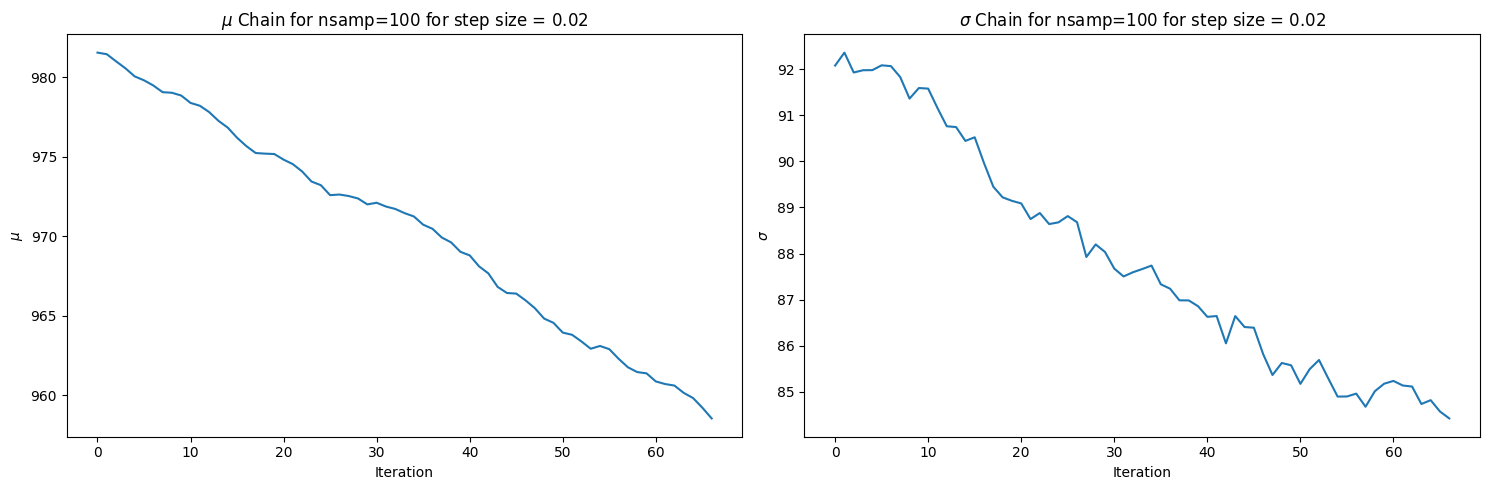

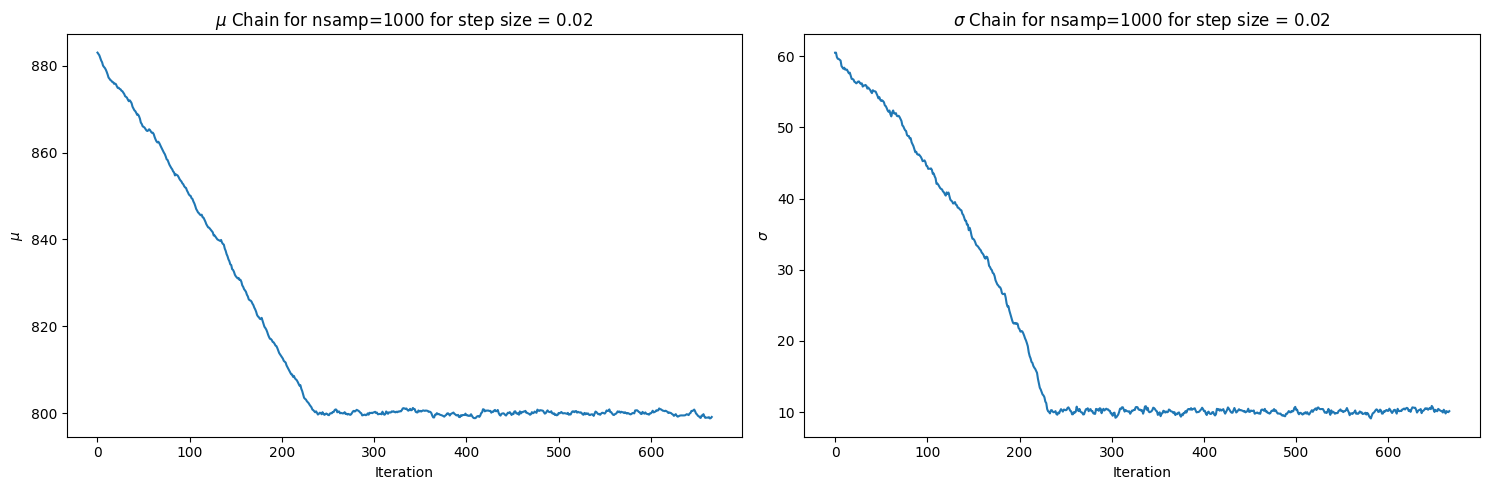

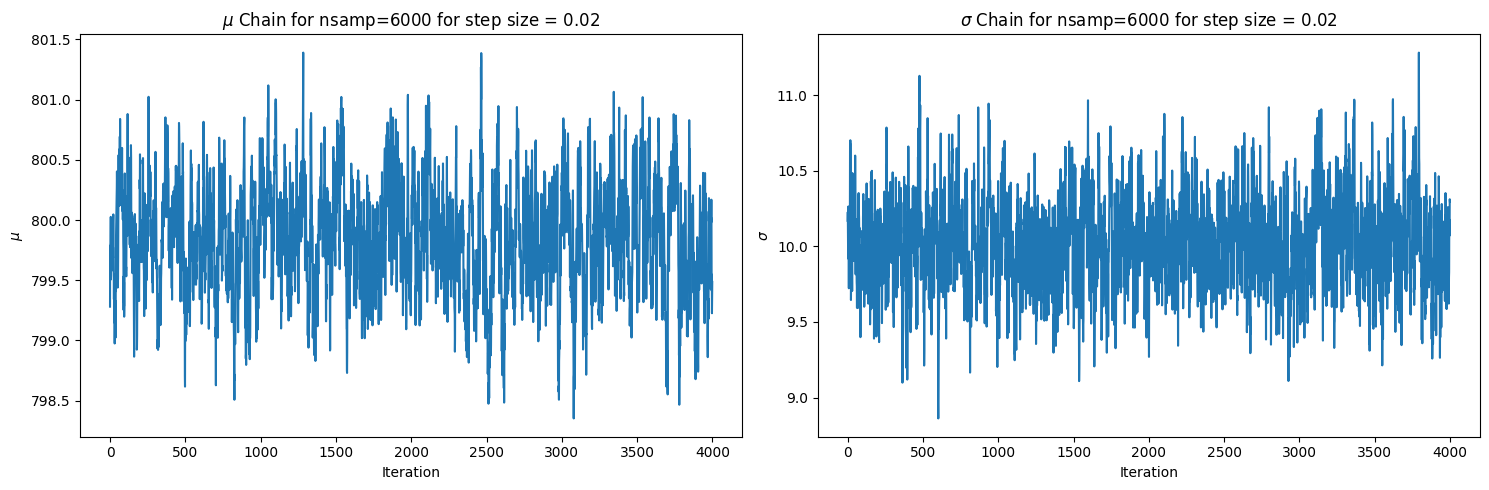

95% credible interval for mu (nsamp = 100): [959.59974489 981.14786023]
95% credible interval for sigma (nsamp = 100): [84.63730401 92.08407902]

95% credible interval for mu (nsamp = 1000): [799.13084196 876.22847584]
95% credible interval for sigma (nsamp = 1000): [ 9.56977243 57.39392808]

95% credible interval for mu (nsamp = 6000): [798.95389755 800.73019643]
95% credible interval for sigma (nsamp = 6000): [ 9.44949232 10.64445741]



In [15]:
# Q3-2
# Set the different values for total samples
sample_settings = [100, 1000, 6000]
burnin_ratios = [1/3, 1/3, 1/3]
step = 0.02
L = 12
initial_q = [1000, 11]

results = []

for nsamp, burnin_ratio in zip(sample_settings, burnin_ratios):
    nburn = int(nsamp * burnin_ratio)
    df_posterior = HMC(y=y, n=len(y), m=1000, s=20, a=10, b=2, step=step, L=L, initial_q=initial_q, nsamp=nsamp, nburn=nburn)
    results.append((nsamp, df_posterior))

# Calculate and print the 95% credible intervals
for nsamp, df_posterior in results:
    mu_credible_interval = np.quantile(df_posterior['mu_chain'], [0.025, 0.975])
    sigma_credible_interval = np.quantile(df_posterior['sigma_chain'], [0.025, 0.975])
    print(f"95% credible interval for mu (nsamp = {nsamp}): {mu_credible_interval}")
    print(f"95% credible interval for sigma (nsamp = {nsamp}): {sigma_credible_interval}\n")


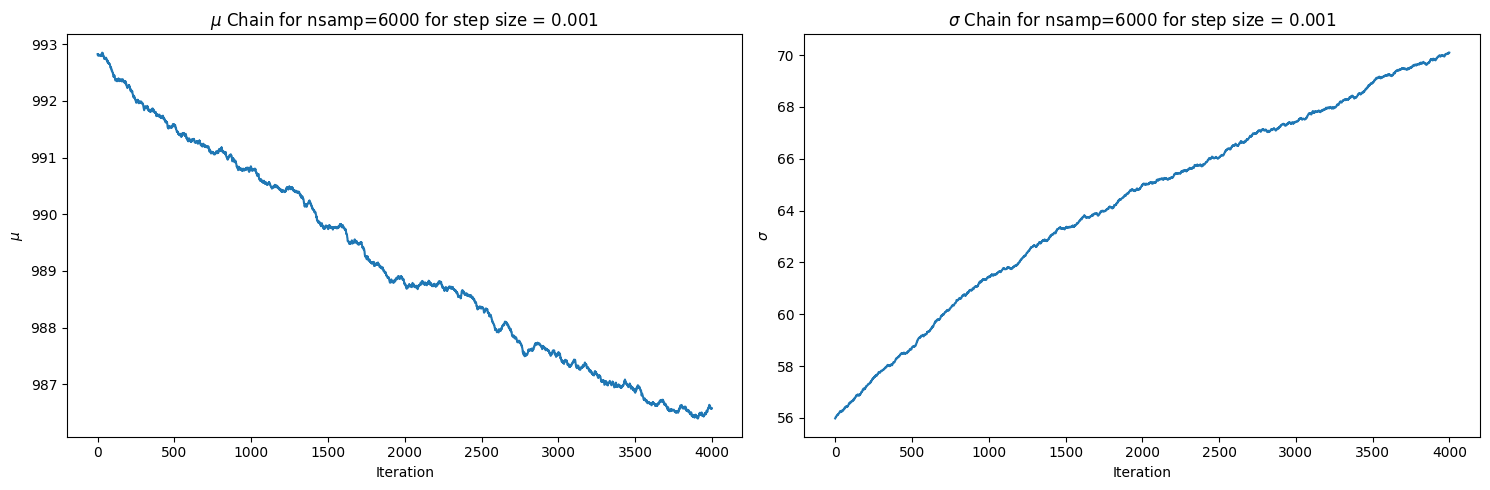

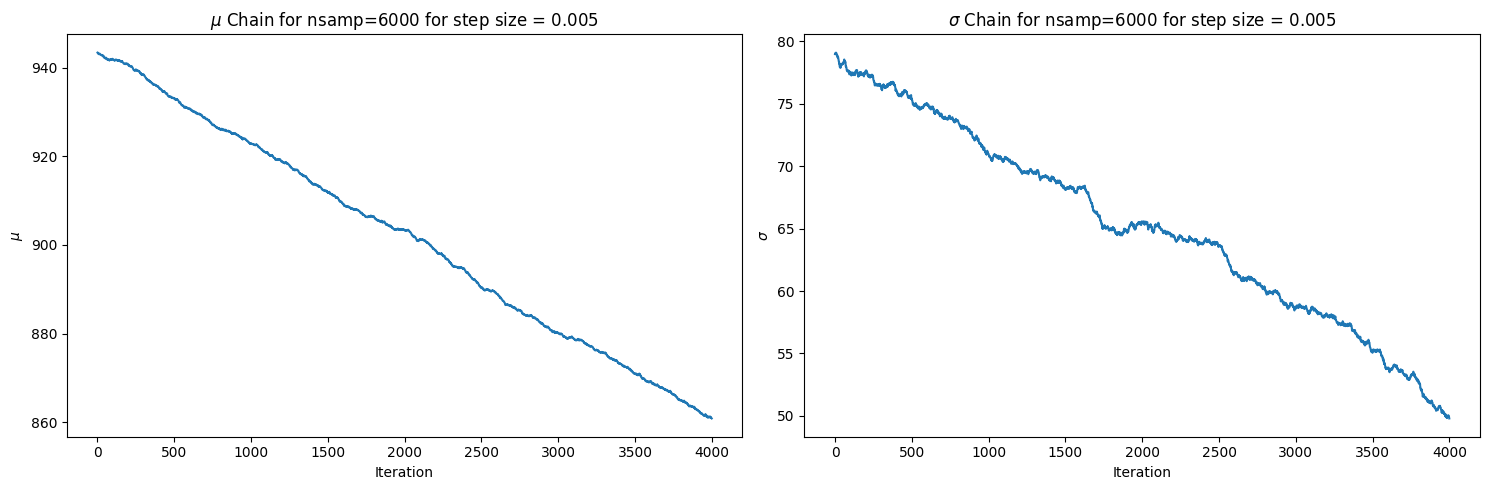

C:\Users\aryan\AppData\Local\Temp\ipykernel_14756\2086665279.py:41: RuntimeWarning: overflow encountered in exp
  accept_prob = min(1, np.exp(current_V + current_T - proposed_V - proposed_T))


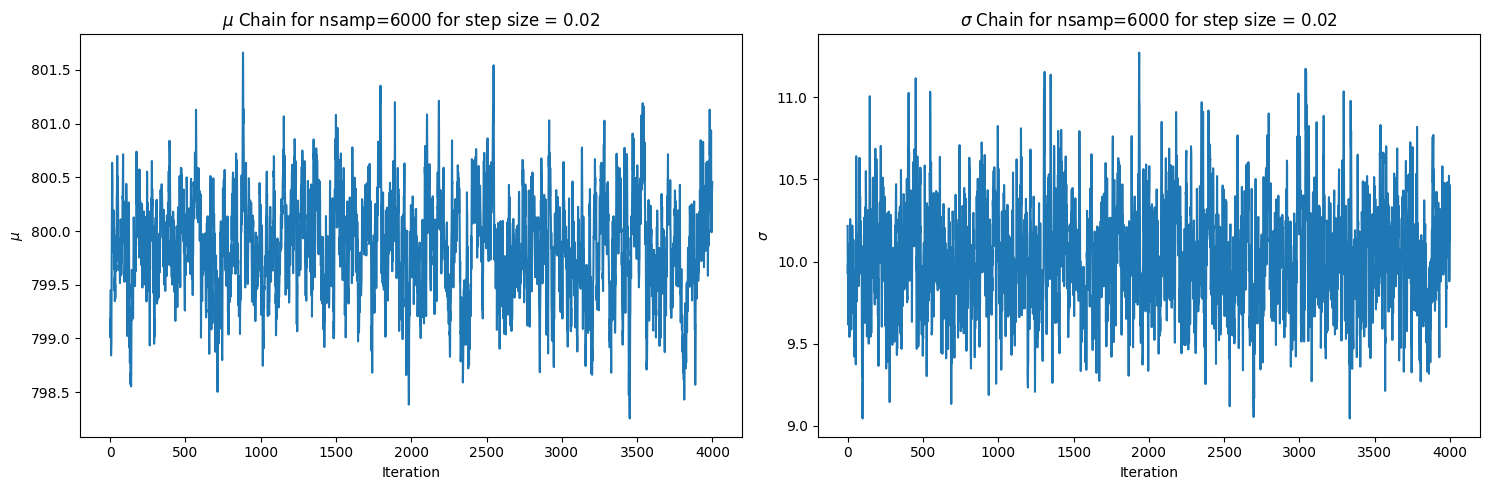

95% credible interval for mu (step = 0.001): [986.49275773 992.48127321]
95% credible interval for sigma (step = 0.001): [56.60202545 69.82925746]

95% credible interval for mu (step = 0.005): [862.94812481 941.75400409]
95% credible interval for sigma (step = 0.005): [50.80799741 77.60283598]

95% credible interval for mu (step = 0.02): [798.92289674 800.73972541]
95% credible interval for sigma (step = 0.02): [ 9.44234403 10.67731551]



In [16]:
# Q3-3
# Set the different values for step size
step_settings = [0.001, 0.005, 0.02]
L = 12
initial_q = [1000, 11]
nsamp = 6000
burnin_ratio = 1/3
nburn = int(nsamp * burnin_ratio)

results_step = []

for step in step_settings:
    df_posterior = HMC(y=y, n=len(y), m=1000, s=20, a=10, b=2, step=step, L=L, initial_q=initial_q, nsamp=nsamp, nburn=nburn)
    results_step.append((step, df_posterior))

# Calculate and print the 95% credible intervals
for step, df_posterior in results_step:
    mu_credible_interval = np.quantile(df_posterior['mu_chain'], [0.025, 0.975])
    sigma_credible_interval = np.quantile(df_posterior['sigma_chain'], [0.025, 0.975])
    print(f"95% credible interval for mu (step = {step}): {mu_credible_interval}")
    print(f"95% credible interval for sigma (step = {step}): {sigma_credible_interval}\n")


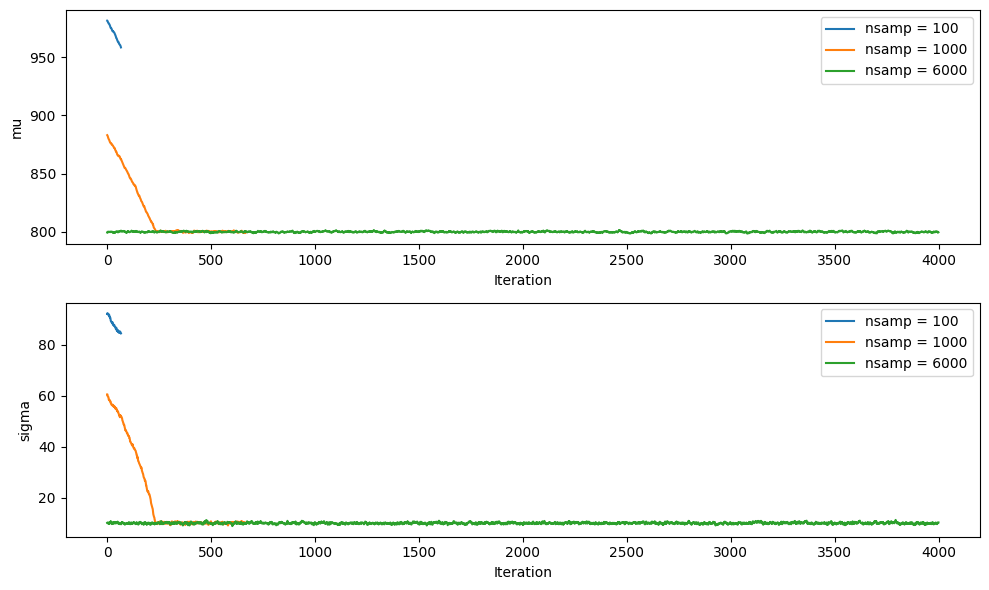

The μ and σ chains from HMC for very small sample size gives highly inaccurate results and also for 1000 samples it starts to show decent results mostly at the end of chain


In [17]:
# Q3-4
# Plot the mu and sigma chains
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(results[0][1]['mu_chain'], label='nsamp = 100')
plt.plot(results[1][1]['mu_chain'], label='nsamp = 1000')
plt.plot(results[2][1]['mu_chain'], label='nsamp = 6000')
plt.xlabel('Iteration')
plt.ylabel('mu')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(results[0][1]['sigma_chain'], label='nsamp = 100')
plt.plot(results[1][1]['sigma_chain'], label='nsamp = 1000')
plt.plot(results[2][1]['sigma_chain'], label='nsamp = 6000')
plt.xlabel('Iteration')
plt.ylabel('sigma')
plt.legend()

plt.tight_layout()
plt.show()


print('The \u03BC and \u03C3 chains from HMC for very small sample size gives highly inaccurate results and also for 1000 samples it starts to show decent results mostly at the end of chain')

For m = 400 & s = 5


C:\Users\aryan\AppData\Local\Temp\ipykernel_14756\2086665279.py:41: RuntimeWarning: overflow encountered in exp
  accept_prob = min(1, np.exp(current_V + current_T - proposed_V - proposed_T))


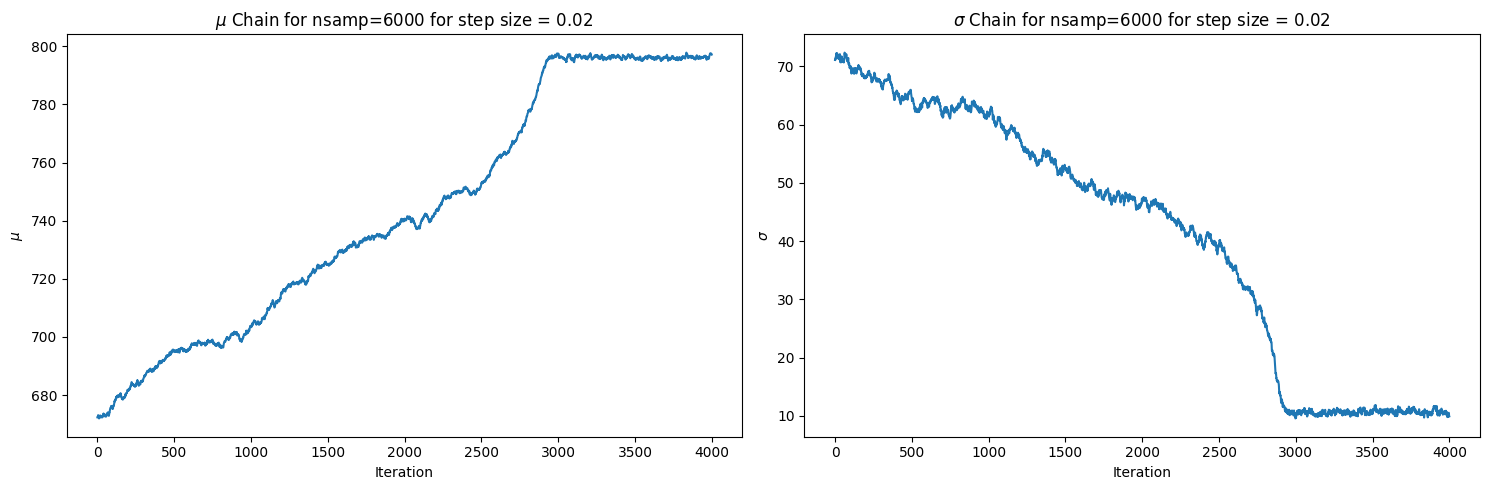

For m = 400 & s = 20


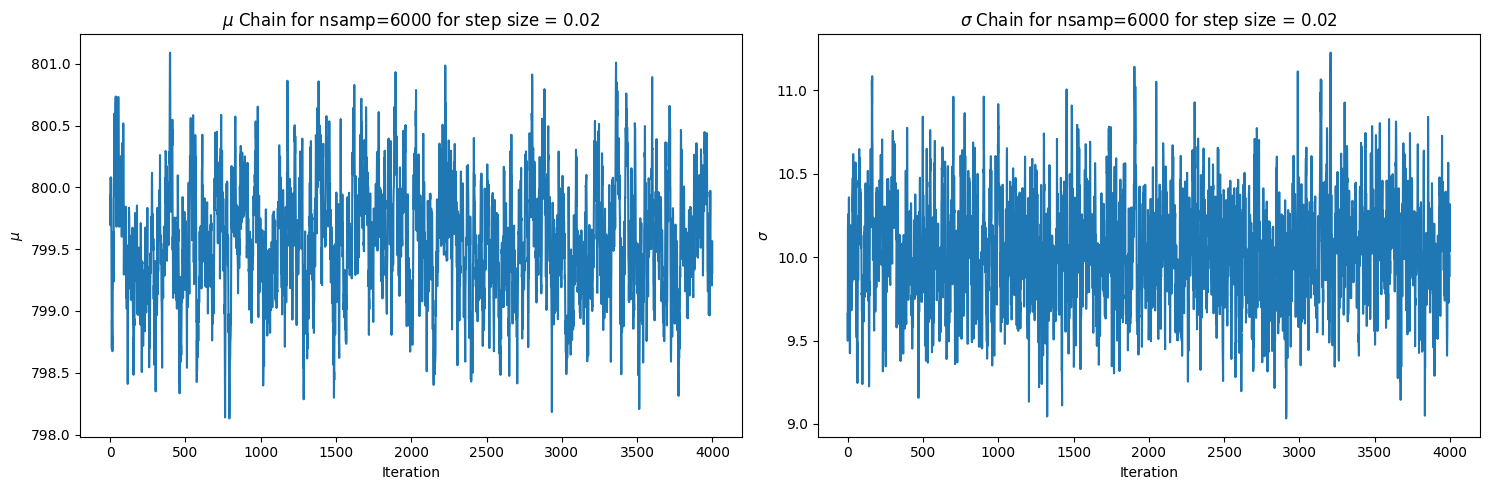

For m = 1000 & s = 5


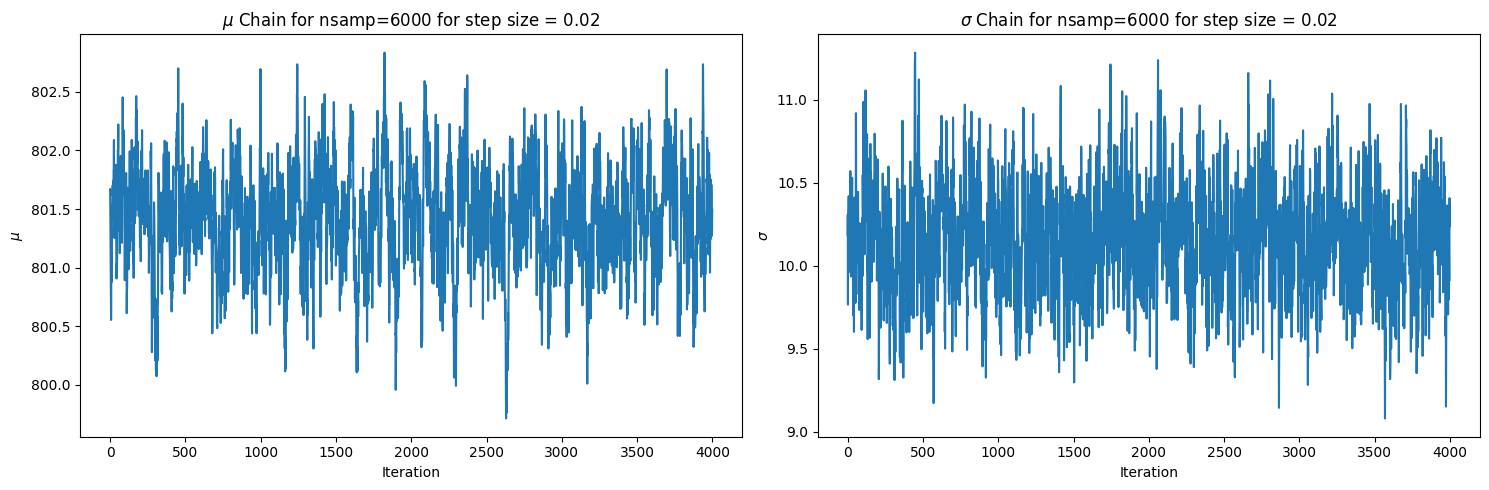

For m = 1000 & s = 20


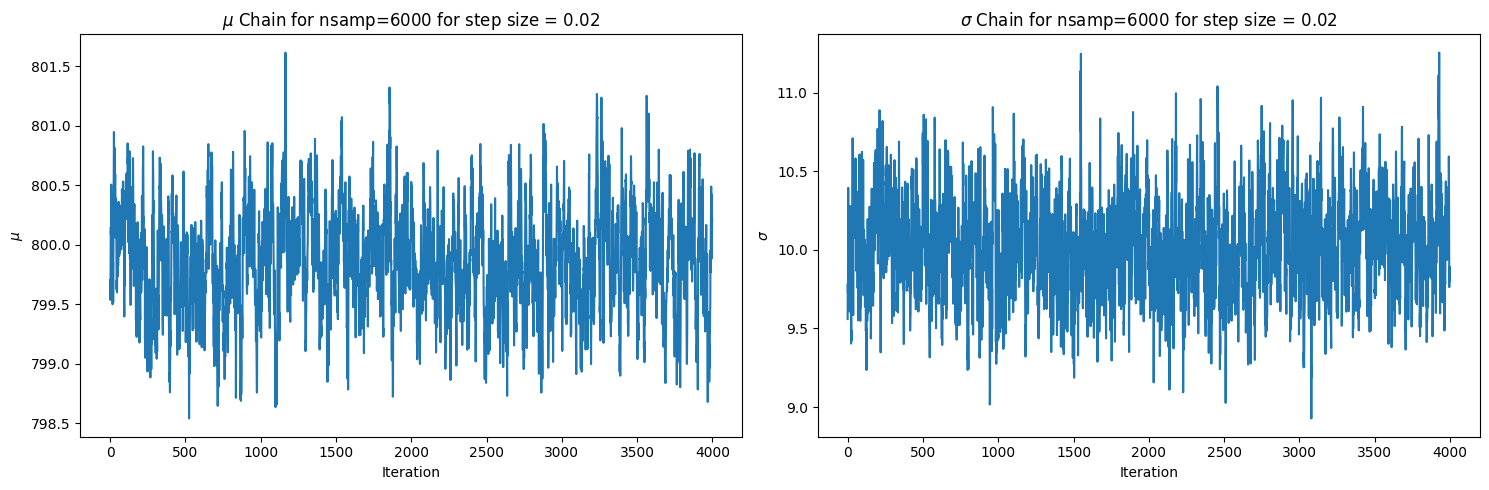

For m = 1000 & s = 100


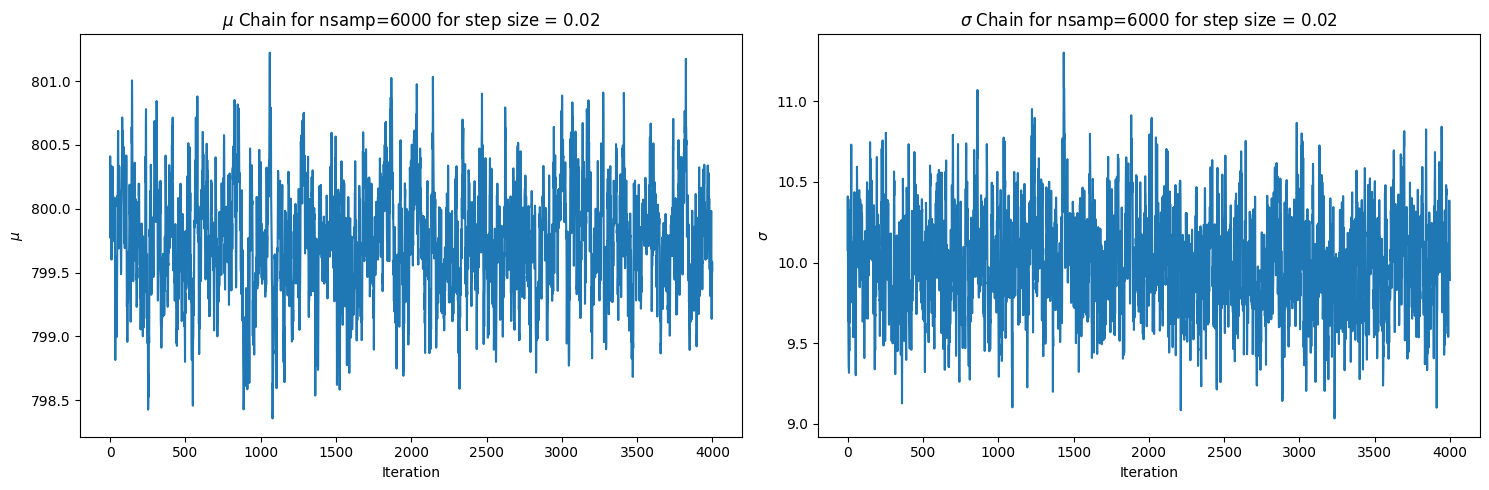

In [18]:
# Q3-5
# Prior sensitivity analysis for µ parameter
sample_settings = [400, 400, 1000, 1000, 1000]
var_settings = [5, 20, 5, 20, 100]
burnin_ratios = [1/3, 1/3, 1/3, 1/3, 1/3]

results_prior_sensitivity = []

for m, s, burnin_ratio in zip(sample_settings, var_settings, burnin_ratios):
    nsamp = 6000
    nburn = int(nsamp * burnin_ratio)
    initial_q = [m, 11]  # Keeping sigma initial value same as before
    print(f'For m = {m} & s = {s}')
    df_posterior_prior_sensitivity = HMC(y=y, n=len(y), m=m, s=s, a=10, b=2, step=0.02, L=12, initial_q=initial_q, nsamp=nsamp, nburn=nburn)
    results_prior_sensitivity.append((f"µ ~ Normal(m={m}, s={s})", df_posterior_prior_sensitivity))
